<a href="https://colab.research.google.com/github/pranshu1504/ae-assignment-3/blob/master/src/pre_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
install.packages(c("readxl", "urca", "ARDL", "forecast", "lmtest", "tseries"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘pbkrtest’, ‘lme4’, ‘car’, ‘dynlm’




In [3]:
library(readxl)
library(urca)
library(ARDL)
library(forecast)
library(lmtest)
library(tseries)

To cite the ARDL package in publications:

Use this reference to refer to the validity of the ARDL package.

  Natsiopoulos, Kleanthis, and Tzeremes, Nickolaos G. (2022). ARDL
  bounds test for cointegration: Replicating the Pesaran et al. (2001)
  results for the UK earnings equation using R. Journal of Applied
  Econometrics, 37(5), 1079-1090. https://doi.org/10.1002/jae.2919

Use this reference to cite this specific version of the ARDL package.

  Kleanthis Natsiopoulos and Nickolaos Tzeremes (2023). ARDL: ARDL, ECM
  and Bounds-Test for Cointegration. R package version 0.2.4.
  https://CRAN.R-project.org/package=ARDL

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




In [5]:
data <- read_excel("final-data-assgn3.xlsx")
head(data)

Month,FOREIGN EXCHANGE RESERVES,RBI REFERENCE RATE: INR PER USD,FOREIGN TRADE EXPORTS,FOREIGN TRADE IMPORTS
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
2015-01,1995000,62.0100,151925.6,200774.2
2015-02,2040180,62.4500,136532.6,178205.4
2015-03,2100630,63.0800,150093.0,221251.6
2015-04,2146200,63.6550,138918.1,210264.0
2015-05,2210960,63.4330,143736.2,209505.9
2015-06,2249340,63.7549,142560.9,214164.7


In [6]:
data$Trade_Balance <- data$`FOREIGN TRADE EXPORTS` - data$`FOREIGN TRADE IMPORTS`
head(data)

Month,FOREIGN EXCHANGE RESERVES,RBI REFERENCE RATE: INR PER USD,FOREIGN TRADE EXPORTS,FOREIGN TRADE IMPORTS,Trade_Balance
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2015-01,1995000,62.0100,151925.6,200774.2,-48848.59
2015-02,2040180,62.4500,136532.6,178205.4,-41672.72
2015-03,2100630,63.0800,150093.0,221251.6,-71158.69
2015-04,2146200,63.6550,138918.1,210264.0,-71345.94
2015-05,2210960,63.4330,143736.2,209505.9,-65769.67
2015-06,2249340,63.7549,142560.9,214164.7,-71603.88


In [7]:
summary(data$Trade_Balance)
summary(data$`RBI REFERENCE RATE: INR PER USD`)
summary(data$`FOREIGN EXCHANGE RESERVES`)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-285357 -152328  -97814 -111808  -71410    5374 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  62.01   66.86   72.38   73.08   79.58   87.40 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
1995000 2502270 3344614 3638287 4684260 5887828 

In [8]:
start_year <- 2015

In [9]:
trade_ts <- ts(data$Trade_Balance, frequency = 12, start = c(start_year, 1))
fxres_ts  <- ts(data$`FOREIGN EXCHANGE RESERVES`, frequency = 12, start = c(start_year, 1))
exrate_ts <- ts(data$`RBI REFERENCE RATE: INR PER USD`, frequency = 12, start = c(start_year, 1))

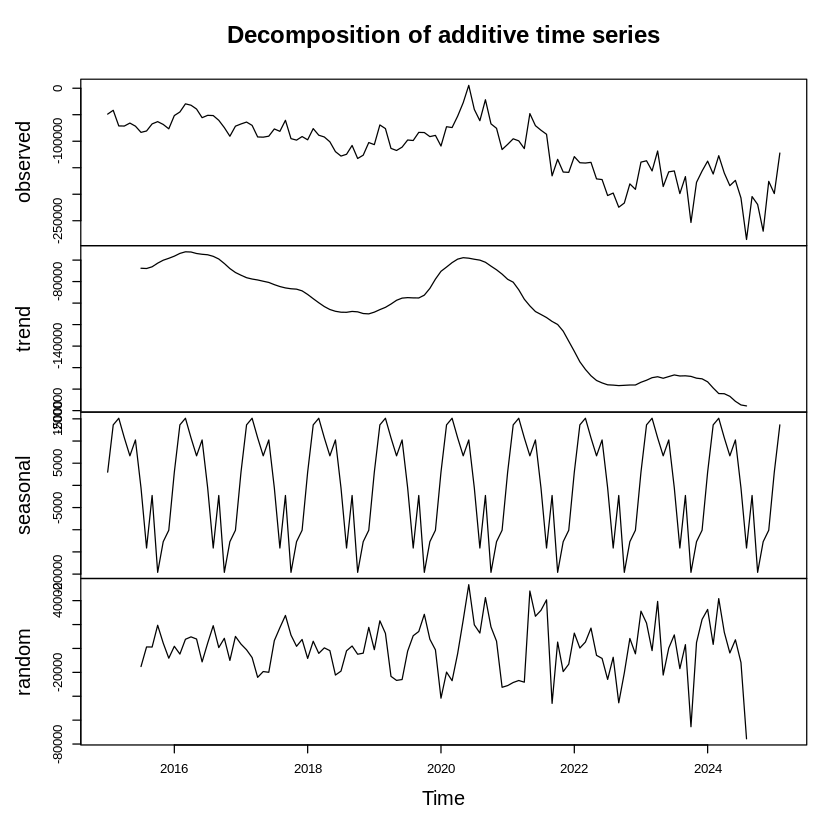

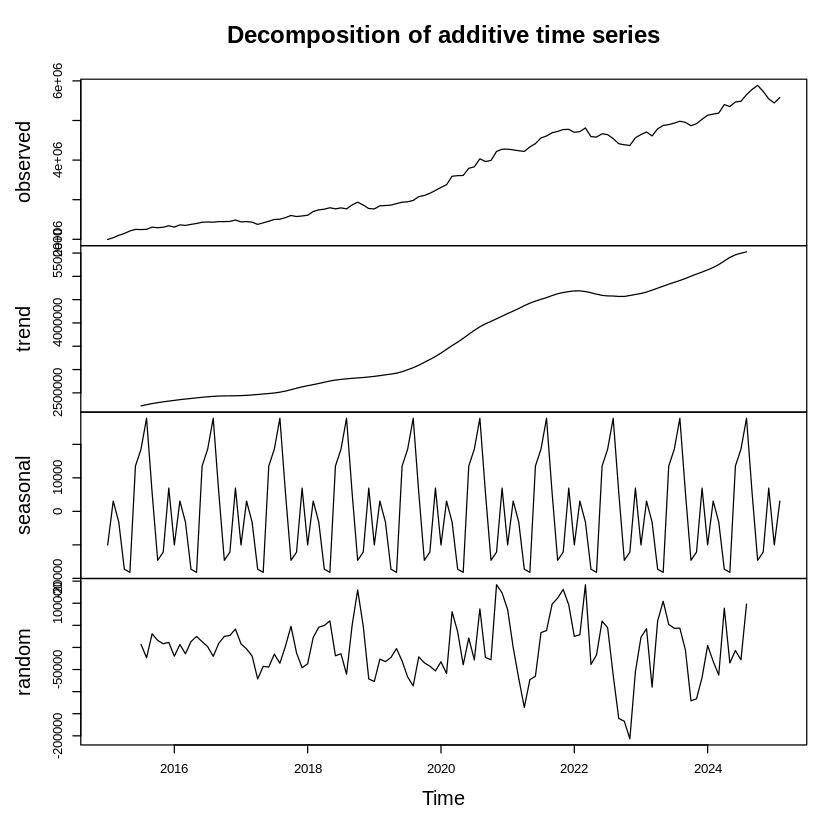

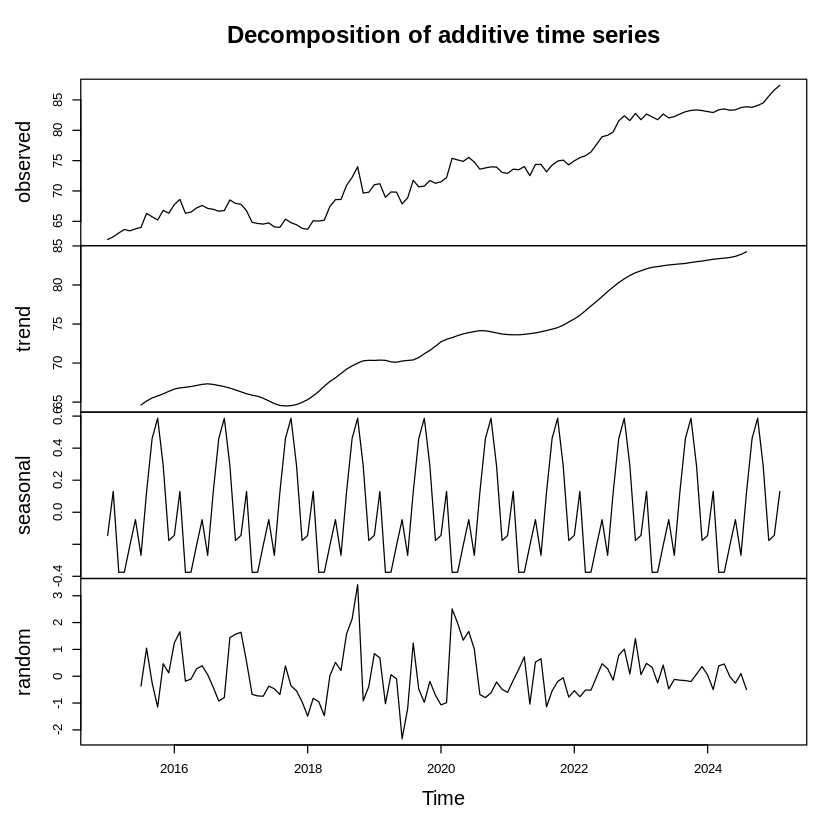

In [10]:
trade_decomp <- decompose(trade_ts, type = "additive")
plot(trade_decomp)

fxres_decomp <- decompose(fxres_ts, type = "additive")
plot(fxres_decomp)

exrate_decomp <- decompose(exrate_ts, type = "additive")
plot(exrate_decomp)

In [11]:
trade_deseasoned <- trade_ts - trade_decomp$seasonal
fxres_deseasoned <- fxres_ts - fxres_decomp$seasonal
exrate_deseasoned <- exrate_ts - exrate_decomp$seasonal

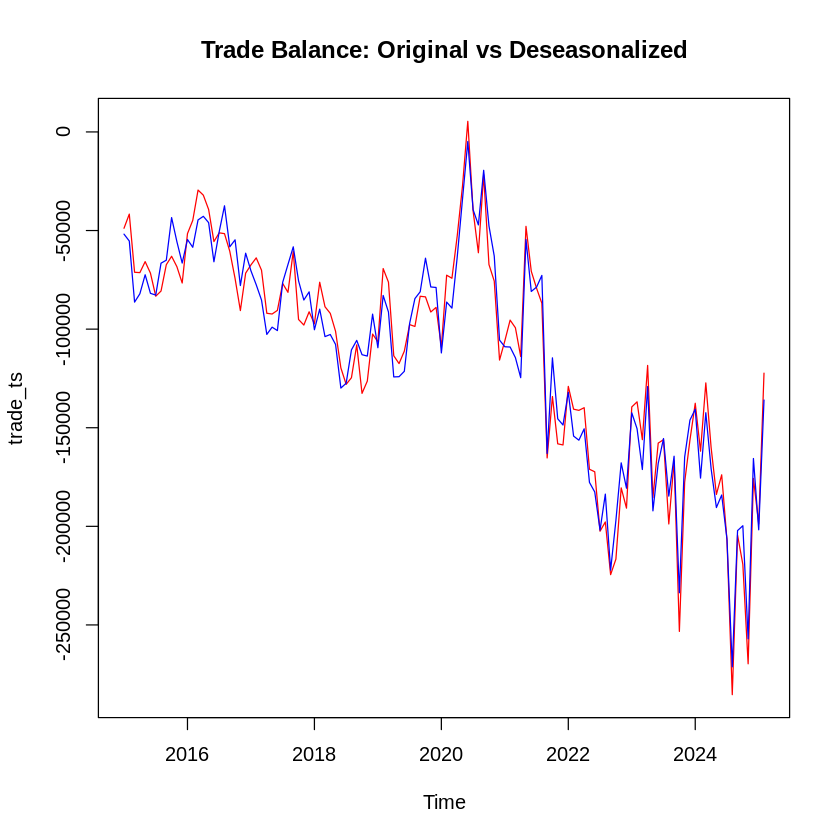

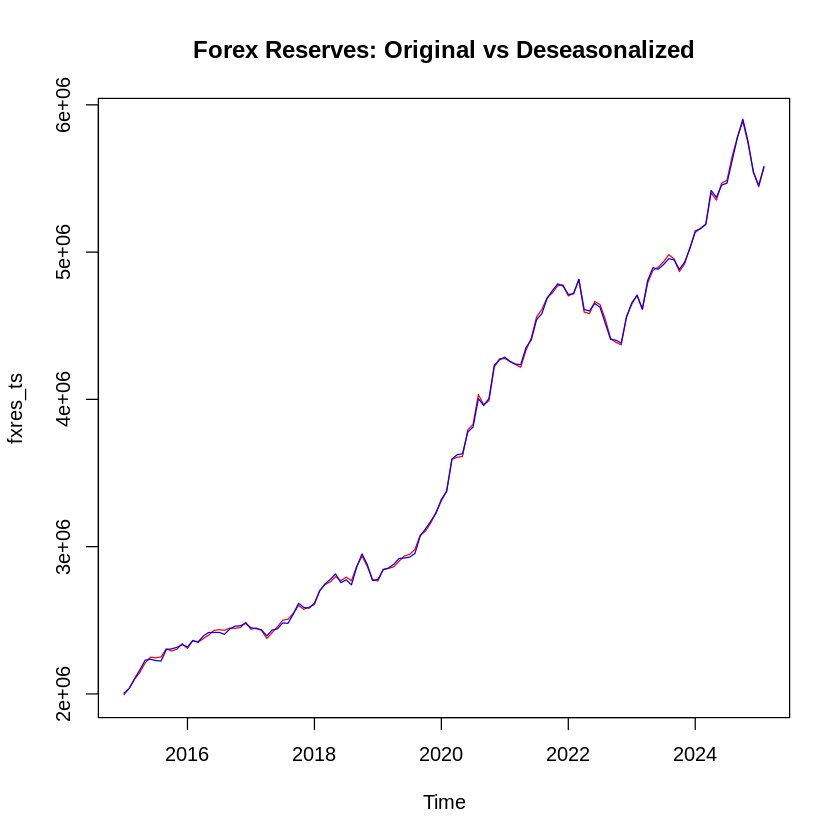

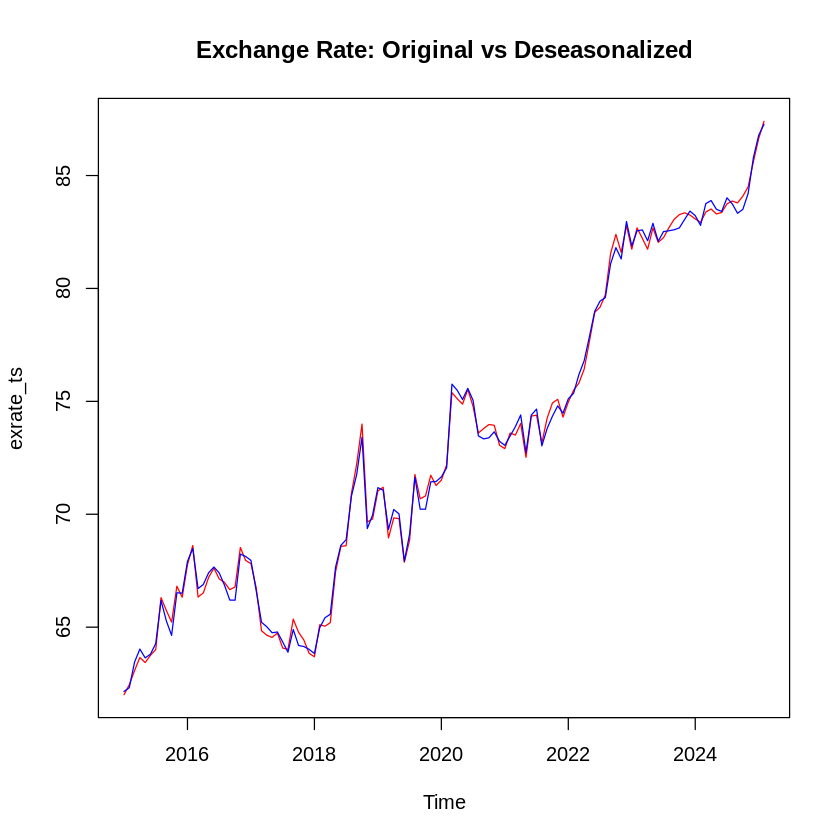

In [12]:
plot(trade_ts, col="red", main="Trade Balance: Original vs Deseasonalized")
lines(trade_deseasoned, col="blue")

plot(fxres_ts, col="red", main="Forex Reserves: Original vs Deseasonalized")
lines(fxres_deseasoned, col="blue")

plot(exrate_ts, col="red", main="Exchange Rate: Original vs Deseasonalized")
lines(exrate_deseasoned, col="blue")

In [13]:
cat("=== Trade Balance ===\n")
summary(ur.df(trade_deseasoned, type = "trend"))
adf.test(trade_deseasoned)
pp.test(trade_deseasoned)
kpss.test(trade_deseasoned)

=== Trade Balance ===



############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
   Min     1Q Median     3Q    Max 
-78292 -12564   -578  14477  68680 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.010e+04  5.324e+03  -1.898 0.060236 .  
z.lag.1     -2.182e-01  7.155e-02  -3.050 0.002837 ** 
tt          -2.517e+02  1.071e+02  -2.351 0.020407 *  
z.diff.lag  -3.369e-01  8.987e-02  -3.749 0.000278 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 24550 on 116 degrees of freedom
Multiple R-squared:  0.2501,	Adjusted R-squared:  0.2307 
F-statistic: 12.89 on 3 and 116 DF,  p-value: 2.503e-07


Value of test-statistic is: -3.0498 3.2064 4.6594 

Critical values for test statistics: 
      1pct  5pct 10pct
tau3 -3.99 -3.43 -3.13
phi2  6.22  4.75


	Augmented Dickey-Fuller Test

data:  trade_deseasoned
Dickey-Fuller = -3.0639, Lag order = 4, p-value = 0.1346
alternative hypothesis: stationary


Warning message in pp.test(trade_deseasoned):
“p-value smaller than printed p-value”



	Phillips-Perron Unit Root Test

data:  trade_deseasoned
Dickey-Fuller Z(alpha) = -39, Truncation lag parameter = 4, p-value =
0.01
alternative hypothesis: stationary


Warning message in kpss.test(trade_deseasoned):
“p-value smaller than printed p-value”



	KPSS Test for Level Stationarity

data:  trade_deseasoned
KPSS Level = 1.7549, Truncation lag parameter = 4, p-value = 0.01


In [14]:
trade_diff <- diff(trade_deseasoned)

In [15]:
adf.test(trade_diff)
kpss.test(trade_diff)
pp.test(trade_diff)

Warning message in adf.test(trade_diff):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  trade_diff
Dickey-Fuller = -5.4804, Lag order = 4, p-value = 0.01
alternative hypothesis: stationary


Warning message in kpss.test(trade_diff):
“p-value greater than printed p-value”



	KPSS Test for Level Stationarity

data:  trade_diff
KPSS Level = 0.043539, Truncation lag parameter = 4, p-value = 0.1


Warning message in pp.test(trade_diff):
“p-value smaller than printed p-value”



	Phillips-Perron Unit Root Test

data:  trade_diff
Dickey-Fuller Z(alpha) = -167.74, Truncation lag parameter = 4, p-value
= 0.01
alternative hypothesis: stationary


In [17]:
cat("=== Forex Reserves ===\n")
summary(ur.df(fxres_deseasoned, type = "trend"))
adf.test(fxres_deseasoned)
pp.test(fxres_deseasoned)
kpss.test(fxres_deseasoned)


=== Forex Reserves ===



############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
    Min      1Q  Median      3Q     Max 
-230521  -31538   -2094   32494  197223 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept)  1.082e+05  4.606e+04   2.349   0.0205 *
z.lag.1     -5.423e-02  2.637e-02  -2.056   0.0420 *
tt           1.845e+03  8.628e+02   2.138   0.0346 *
z.diff.lag   1.752e-01  9.142e-02   1.917   0.0578 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 74360 on 116 degrees of freedom
Multiple R-squared:  0.06042,	Adjusted R-squared:  0.03612 
F-statistic: 2.486 on 3 and 116 DF,  p-value: 0.06405


Value of test-statistic is: -2.0564 5.4983 2.2926 

Critical values for test statistics: 
      1pct  5pct 10pct
tau3 -3.99 -3.43 -3.13
phi2  6.22  4.75


	Augmented Dickey-Fuller Test

data:  fxres_deseasoned
Dickey-Fuller = -2.2715, Lag order = 4, p-value = 0.4638
alternative hypothesis: stationary



	Phillips-Perron Unit Root Test

data:  fxres_deseasoned
Dickey-Fuller Z(alpha) = -6.7544, Truncation lag parameter = 4, p-value
= 0.7257
alternative hypothesis: stationary


Warning message in kpss.test(fxres_deseasoned):
“p-value smaller than printed p-value”



	KPSS Test for Level Stationarity

data:  fxres_deseasoned
KPSS Level = 2.4692, Truncation lag parameter = 4, p-value = 0.01


In [18]:
fxres_diff <- diff(fxres_deseasoned)

In [19]:
adf.test(fxres_diff)
pp.test(fxres_diff)
kpss.test(fxres_diff)


	Augmented Dickey-Fuller Test

data:  fxres_diff
Dickey-Fuller = -3.7482, Lag order = 4, p-value = 0.02385
alternative hypothesis: stationary


Warning message in pp.test(fxres_diff):
“p-value smaller than printed p-value”



	Phillips-Perron Unit Root Test

data:  fxres_diff
Dickey-Fuller Z(alpha) = -95.866, Truncation lag parameter = 4, p-value
= 0.01
alternative hypothesis: stationary


Warning message in kpss.test(fxres_diff):
“p-value greater than printed p-value”



	KPSS Test for Level Stationarity

data:  fxres_diff
KPSS Level = 0.12179, Truncation lag parameter = 4, p-value = 0.1


In [20]:
cat("=== Exchange Rate ===\n")
summary(ur.df(exrate_deseasoned, type = "trend"))
adf.test(exrate_deseasoned)
pp.test(exrate_deseasoned)
kpss.test(exrate_deseasoned)

=== Exchange Rate ===



############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.8414 -0.5077 -0.0362  0.4785  3.3902 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept)  6.347020   2.725527   2.329   0.0216 *
z.lag.1     -0.101171   0.044291  -2.284   0.0242 *
tt           0.020484   0.008724   2.348   0.0206 *
z.diff.lag  -0.037266   0.093423  -0.399   0.6907  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9933 on 116 degrees of freedom
Multiple R-squared:  0.05298,	Adjusted R-squared:  0.02849 
F-statistic: 2.163 on 3 and 116 DF,  p-value: 0.09614


Value of test-statistic is: -2.2842 3.8332 2.7676 

Critical values for test statistics: 
      1pct  5pct 10pct
tau3 -3.99 -3.43 -3.13
phi2  6.22  4.75  4.


	Augmented Dickey-Fuller Test

data:  exrate_deseasoned
Dickey-Fuller = -2.5678, Lag order = 4, p-value = 0.3407
alternative hypothesis: stationary



	Phillips-Perron Unit Root Test

data:  exrate_deseasoned
Dickey-Fuller Z(alpha) = -12.883, Truncation lag parameter = 4, p-value
= 0.3711
alternative hypothesis: stationary


Warning message in kpss.test(exrate_deseasoned):
“p-value smaller than printed p-value”



	KPSS Test for Level Stationarity

data:  exrate_deseasoned
KPSS Level = 2.394, Truncation lag parameter = 4, p-value = 0.01


In [21]:
exrate_diff <- diff(exrate_deseasoned)

In [22]:
adf.test(exrate_diff)
pp.test(exrate_diff)
kpss.test(exrate_diff)

Warning message in adf.test(exrate_diff):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  exrate_diff
Dickey-Fuller = -4.12, Lag order = 4, p-value = 0.01
alternative hypothesis: stationary


Warning message in pp.test(exrate_diff):
“p-value smaller than printed p-value”



	Phillips-Perron Unit Root Test

data:  exrate_diff
Dickey-Fuller Z(alpha) = -127.25, Truncation lag parameter = 4, p-value
= 0.01
alternative hypothesis: stationary


Warning message in kpss.test(exrate_diff):
“p-value greater than printed p-value”



	KPSS Test for Level Stationarity

data:  exrate_diff
KPSS Level = 0.076069, Truncation lag parameter = 4, p-value = 0.1


In [23]:
colnames(data)

[1] "Month"                           "FOREIGN EXCHANGE RESERVES"      
[3] "RBI REFERENCE RATE: INR PER USD" "FOREIGN TRADE EXPORTS"          
[5] "FOREIGN TRADE IMPORTS"           "Trade_Balance"

In [24]:
# prompt: make new table with trade_diff, fxres_diff, exrate_diff

new_data <- data.frame(trade_diff, fxres_diff, exrate_diff)
head(new_data)


,trade_diff,fxres_diff,exrate_diff
,<dbl>,<dbl>,<dbl>
1,-3479.635,32086.381,0.1651116
2,-30979.492,66728.047,1.1354690
3,4229.589,59625.268,0.5741356
4,9630.165,65695.118,-0.3896861
5,-9409.709,6645.265,0.1615125
6,-890.220,-8955.697,0.4731724


In [25]:
head(data)

Month,FOREIGN EXCHANGE RESERVES,RBI REFERENCE RATE: INR PER USD,FOREIGN TRADE EXPORTS,FOREIGN TRADE IMPORTS,Trade_Balance
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2015-01,1995000,62.0100,151925.6,200774.2,-48848.59
2015-02,2040180,62.4500,136532.6,178205.4,-41672.72
2015-03,2100630,63.0800,150093.0,221251.6,-71158.69
2015-04,2146200,63.6550,138918.1,210264.0,-71345.94
2015-05,2210960,63.4330,143736.2,209505.9,-65769.67
2015-06,2249340,63.7549,142560.9,214164.7,-71603.88


In [26]:
write.csv(new_data, "deseas.csv")